## Dataset Source - https://www.kaggle.com/mssmartypants/paris-housing-price-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import hvplot.pandas
%matplotlib inline

In [2]:
# Loading the dataset

In [3]:
housing = pd.read_csv('ParisHousing-im.csv')

In [4]:
housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,64232,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7610393.0
1,74968,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8097419.0
2,63506,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5549713.0
3,33945,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3215499.0
4,66658,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7054195.0


In [5]:
housing.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,50101.884900,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993739e+06
std,29039.641647,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877345e+06
min,7.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,4.204000e+02
25%,25392.750000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.514898e+06
50%,49936.500000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.022344e+06
75%,74470.000000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.462374e+06
max,113884.000000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.003197e+07


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [7]:
# Determining whether there are any null values in any column by taking their count

In [8]:
housing.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [9]:
# 0 signifies there are no null values in any column and therefore none in the dataset

### Visualising Data

<AxesSubplot:xlabel='price', ylabel='Density'>

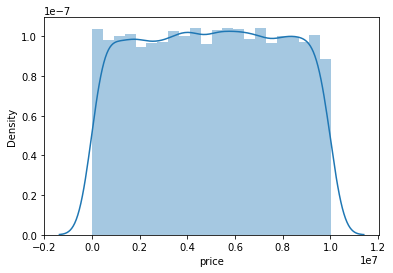

In [10]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(housing['price'])

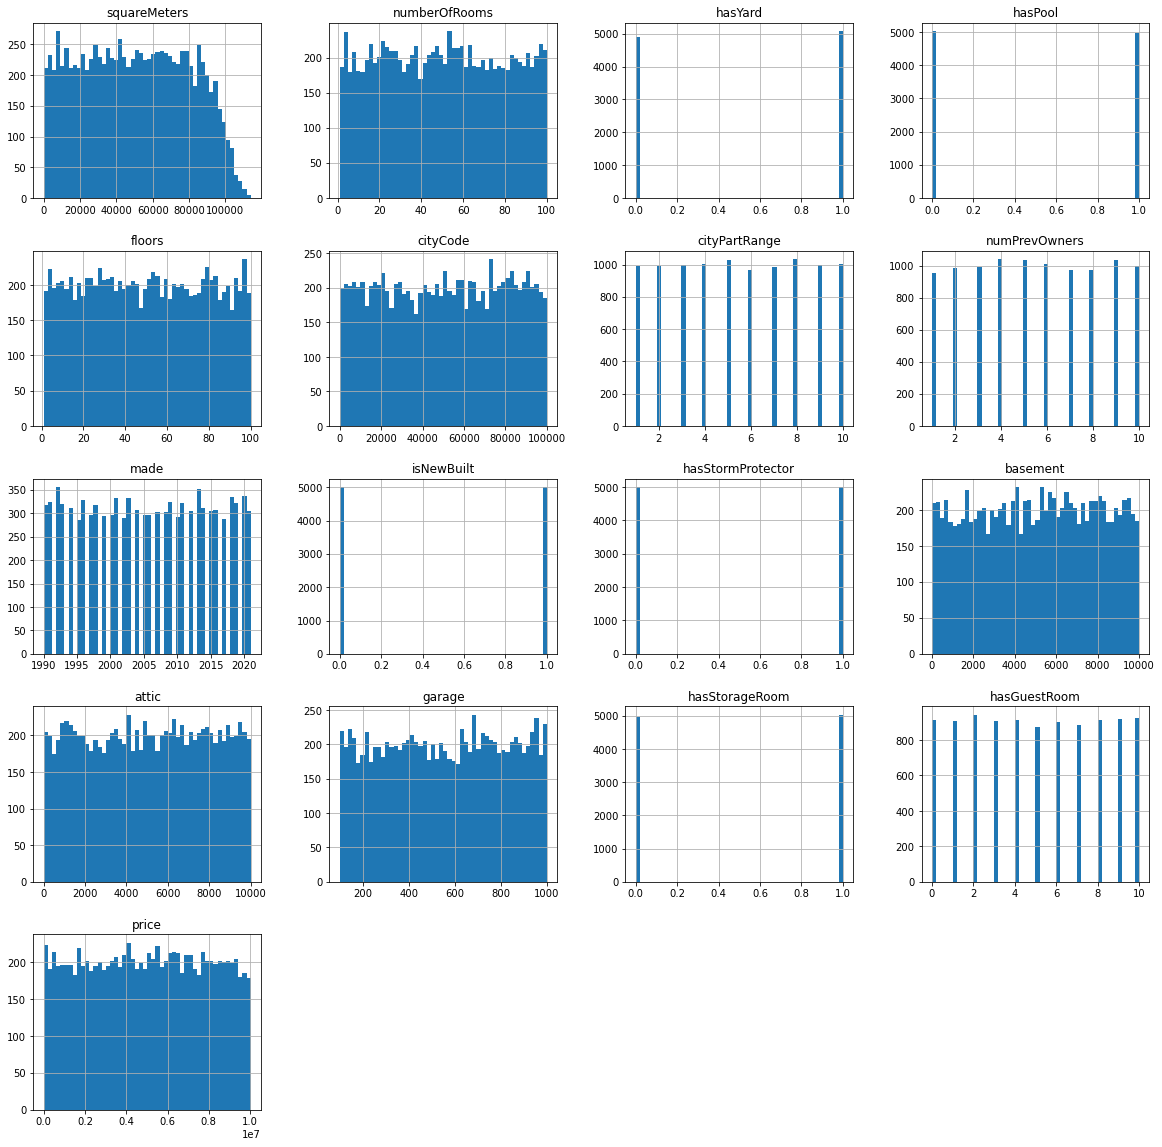

In [11]:
housing.hist(bins = 50, figsize = (20,20))
plt.show()

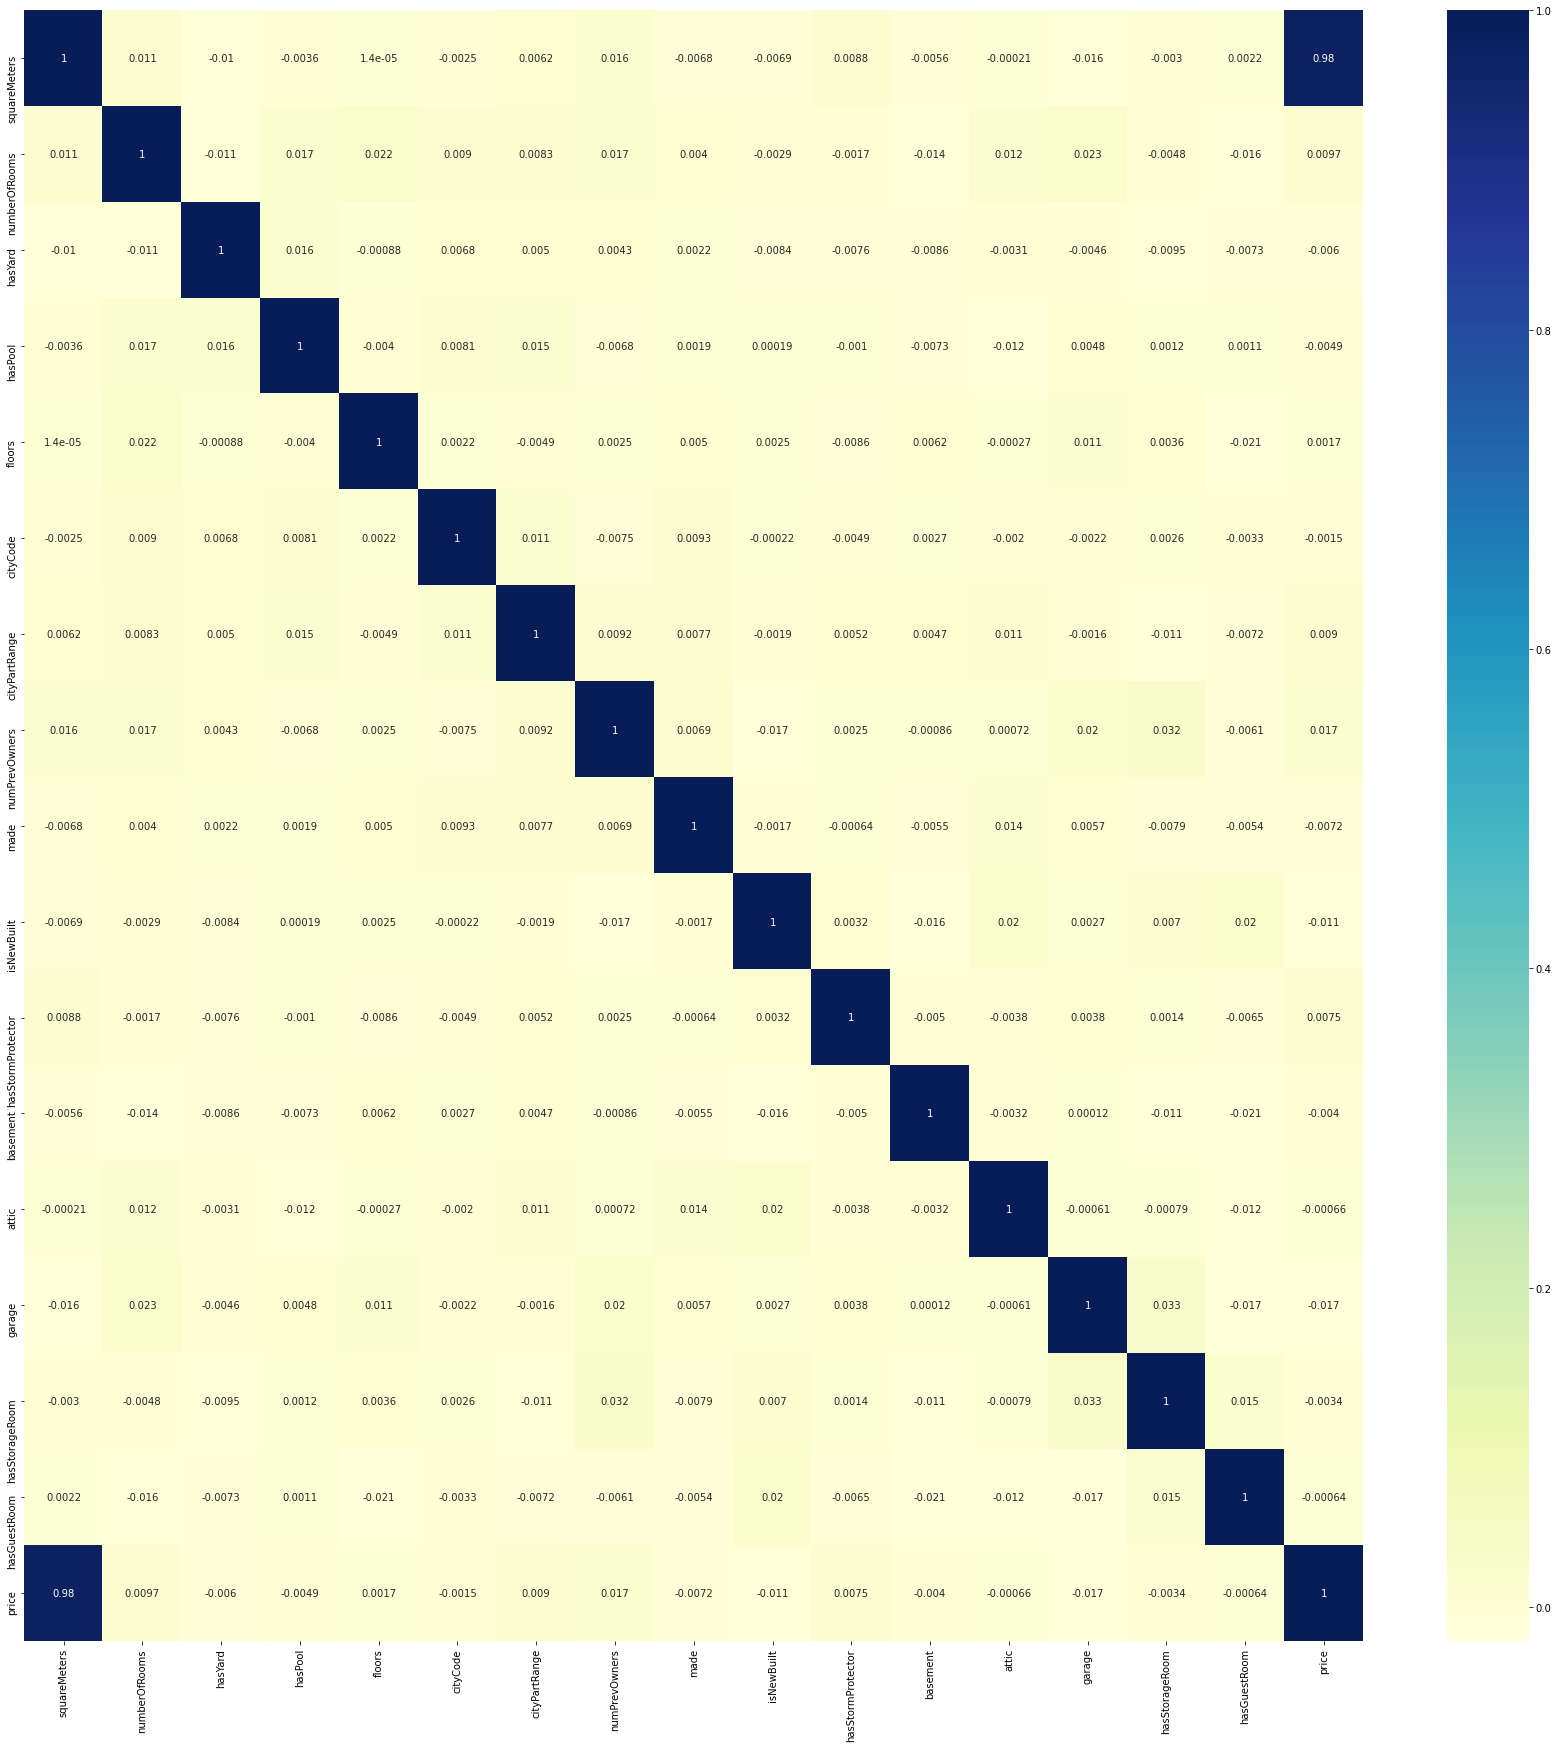

In [12]:
plt.figure(figsize = (30,30))
sns.heatmap(housing.corr(), annot = True, cmap = "YlGnBu")
plt.show()

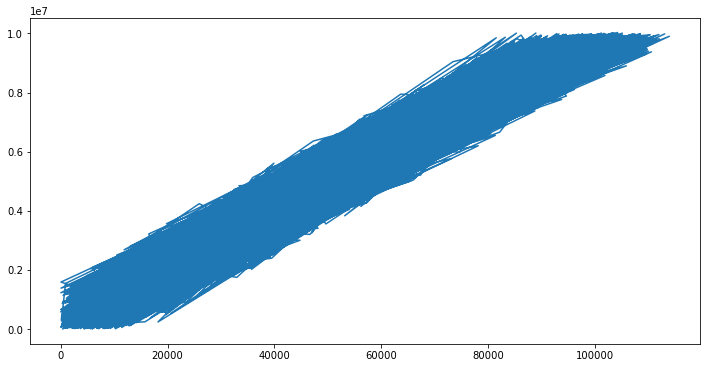

In [13]:
plt.figure(figsize=(12,6))
plt.plot(housing['squareMeters'], housing['price'])

### Splitting the dataset

In [14]:
y = housing['price']
X = housing.drop('price', axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [17]:
# % of training set
train_pct = 100*len(X_train)/len(X)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/y.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [20]:
score_t = linreg.score(X_test, y_test)
print("Linear Regression Score: ", score_t)

Linear Regression Score:  0.9538343553453811


### Evaluating Linear Regression

In [21]:
ly_pred = linreg.predict(X_test)
lin_mse = mean_squared_error(y_test, ly_pred)
lin_r2 = r2_score(y_test, ly_pred)
print('Mean squared error for Linear Regression: ', lin_mse)
print('R Squared for Linear Regression: ', lin_r2)

Mean squared error for Linear Regression:  376024372923.6365
R Squared for Linear Regression:  0.9538343553453811


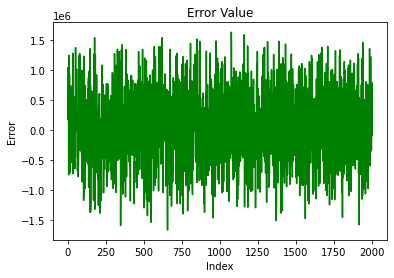

In [22]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-ly_pred,color='green',linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

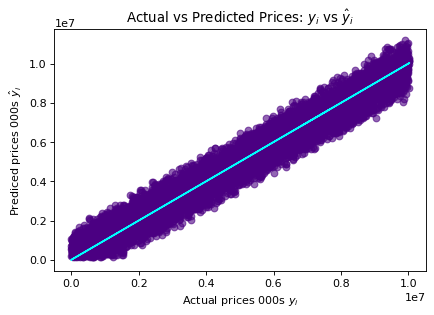

In [23]:
predicted_vals = linreg.predict(X_train)
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=80)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$',)
plt.xlabel('Actual prices 000s $y _i$')
plt.ylabel('Prediced prices 000s $\hat y _i$')
plt.show()

## Random Forest Regression

In [24]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
rfscore = rfreg.score(X_test, y_test)
print('Random Forest Score : ',rfscore)

Random Forest Score :  0.9538202669342305


### Evaluating Random Forest Regression

In [26]:
rf_pred = rfreg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print('Mean Squared Error for Random Forest Regression : ', rf_mse)
print('R Squared for Random Forest Regression : ', rf_r2)

Mean Squared Error for Random Forest Regression :  376139124618.49524
R Squared for Random Forest Regression :  0.9538202669342305


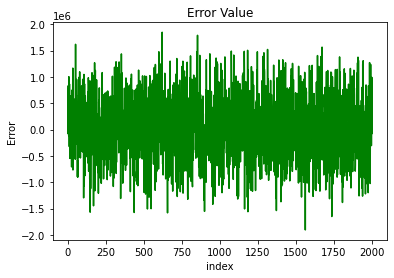

In [27]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-rf_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

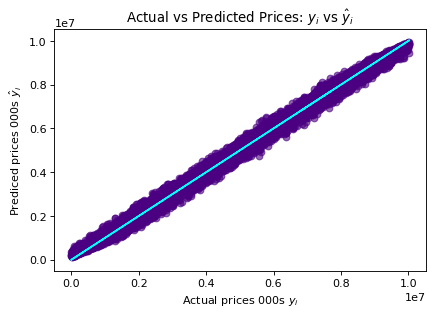

In [29]:
predicted_vals_rf = rfreg.predict(X_train)
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=80)
plt.scatter(x=y_train, y=predicted_vals_rf, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$',)
plt.xlabel('Actual prices 000s $y _i$')
plt.ylabel('Prediced prices 000s $\hat y _i$')
plt.show()

## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1) #a higher value of alpha restricts the coefficients further
ls.fit(X_train,y_train)

Lasso(alpha=0.1)

In [31]:
lsscore = ls.score(X_test, y_test)
print('Lasso Regression Score : ',lsscore)

Lasso Regression Score :  0.9538343556710501


### Evaluation Lasso Regression

In [32]:
ls_pred = ls.predict(X_test)
ls_mse = mean_squared_error(y_test, ls_pred)
ls_r2 = r2_score(y_test, ls_pred)

print('Mean squared error for Lasso Regression : ', ls_mse)
print('R Squared error for Lasso Regression : ', ls_r2)

Mean squared error for Lasso Regression :  376024370271.02515
R Squared error for Lasso Regression :  0.9538343556710501


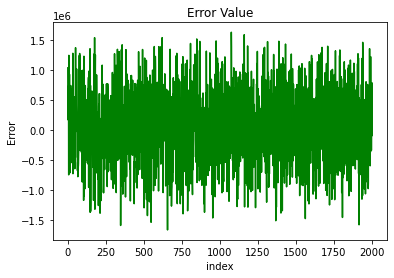

In [33]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-ls_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

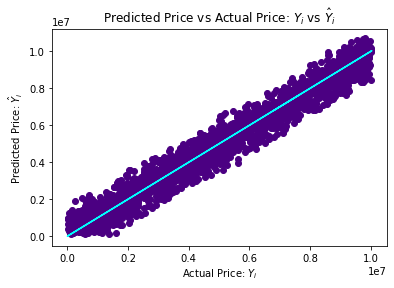

In [34]:
y_pred = ls.predict(X_test) #predictions on testing data
# We plot predicted Y (y-axis) against actual Y (x-axis). Perfect predictions will lie on the diagonal. We see the diagonal trend, suggesting a 'good' fit

plt.scatter(y_test,y_pred, color='indigo')
plt.plot(y_train, y_train, color='cyan')
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Comparison of Mean Squared Error and R-Squared

In [35]:
mse = {'Linear':lin_mse, 'RandomForest':rf_mse, 'Lasso':ls_mse}
r_square = {'Linear':lin_r2, 'RandomForest':rf_r2, 'Lasso':ls_r2}

In [38]:
print('Mean Squared Error: ',mse)
print('R Squared Error: ',r_square)

Mean Squared Error:  {'Linear': 376024372923.6365, 'RandomForest': 376139124618.49524, 'Lasso': 376024370271.02515}
R Squared Error:  {'Linear': 0.9538343553453811, 'RandomForest': 0.9538202669342305, 'Lasso': 0.9538343556710501}
